In [3]:
import shap

In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, NormalPredictor, Reader, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import spacy
import textacy
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
# import stellargraph as sg
# import tensorflow as tf
# from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# from stellargraph import datasets
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.metrics import roc_curve, auc
from random import sample

In [2]:
df0 = pd.read_csv("Data/cancer_dataset.csv", encoding='latin1', index_col=0)
df = df0["a"]

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df0['0'])
set(labels)

{0, 1, 2}

In [3]:
with open("Data/recommender_preds.pickle", "rb") as f:
    y_pred0 = pkl.load(f)

In [4]:
with open("Data/combined_graphed.pkl", "rb") as f:
    node_vectors_list_cmb = pkl.load(f)

with open("Data/individual_graphed.pkl", "rb") as f:
    node_vectors_list_ind = pkl.load(f)

In [5]:
len_each_graph = [len(i) for i in node_vectors_list_ind]
print(len_each_graph[:20])

[88, 76, 91, 90, 117, 125, 94, 106, 188, 203, 182, 170, 167, 183, 203, 45, 144, 185, 182, 161]


In [6]:
vec_list = np.array(node_vectors_list_cmb[0])
len(vec_list)

1009270

In [7]:
labels_extended = []
for i, l in enumerate(len_each_graph):
    labels_extended.extend([labels[i]]*l)
X_train, X_test, y_train, y_test = train_test_split(
    vec_list, labels_extended, test_size=0.0001
)
#model = LinearSVC()
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.48514851485148514
F1 Score: 0.5331167211125466


In [9]:
y_pred = model.predict(vec_list)
accuracy_score(y_pred, labels_extended)

0.482251528332359

In [10]:
y_pred_proba = model.predict_proba(vec_list)

In [11]:
y_pred_proba

array([[1.92079637e-078, 2.88489379e-073, 1.00000000e+000],
       [9.59962496e-107, 2.90769950e-097, 1.00000000e+000],
       [2.86469218e-169, 1.41450679e-159, 1.00000000e+000],
       ...,
       [8.62988386e-001, 1.14048324e-001, 2.29632900e-002],
       [8.60220480e-001, 1.19014982e-001, 2.07645378e-002],
       [8.55458683e-001, 1.09876908e-001, 3.46644083e-002]])

In [13]:
K = 100  # Number of samples to use
background = shap.sample(X_train, K)

explainer = shap.KernelExplainer(model.predict_proba, background)

In [37]:
shap_values0 = explainer(X_test)

  0%|          | 0/101 [00:00<?, ?it/s]

In [14]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/101 [00:00<?, ?it/s]

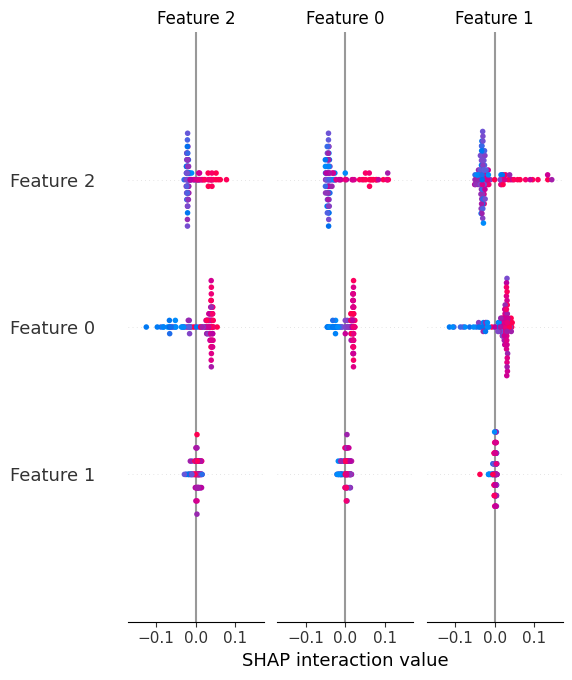

In [47]:
shap.summary_plot(shap_values, X_test)

In [12]:
#

In [12]:
topics_extended = []
for i, l in enumerate(len_each_graph):
    topics_extended.extend([y_pred0[i]]*l)
len(topics_extended)

1009270

In [13]:
differences_index_bert_human = []
for i, l in enumerate(labels_extended):
    if l != topics_extended[i]:
        differences_index_bert_human.append(i)
len(differences_index_bert_human)

61491

In [41]:
differences_index_ml_human = []
for i, l in enumerate(y_pred):
    if l != labels_extended[i]:
        differences_index_ml_human.append(i)
len(differences_index_ml_human)

522548

In [14]:
differences_index_ml_bert = []
for i, l in enumerate(y_pred):
    if l != topics_extended[i]:
        differences_index_ml_bert.append(i)
len(differences_index_ml_bert)

566327

In [15]:
differences_index_ml_bert_human = []
for i in differences_index_ml_bert:
    if (labels_extended[i] != topics_extended[i]) and (labels_extended[i] != y_pred[i]):
        differences_index_ml_bert_human.append(i)
len(differences_index_ml_bert_human)

17712

In [16]:
differences_index_ml_bert_nothuman = np.setdiff1d(differences_index_ml_bert, differences_index_ml_bert_human)
len(differences_index_ml_bert_nothuman)

548615

In [43]:
zita_index = len(differences_index_ml_bert_human)/len(differences_index_ml_human)
zita_index

0.0338954507528495

In [17]:
#

In [32]:
diff = differences_index_ml_bert
inconsistency_probs = np.array([y_pred_proba[i][j] for i, j in zip(diff, np.array(topics_extended)[diff])])
sorted_diff = sorted(list(enumerate(inconsistency_probs)), key=lambda x: x[1], reverse=True)

In [33]:
alpha = 0.7
diff = sample(diff, round(len(diff)*alpha))

In [20]:
diff

[381950,
 532250,
 141007,
 839791,
 644708,
 734540,
 942512,
 825701,
 306249,
 600227,
 239456,
 440999,
 817659,
 8703,
 196615,
 496680,
 64667,
 127623,
 667014,
 758378,
 649750,
 711084,
 125815,
 551016,
 521617,
 549707,
 219674,
 933955,
 813807,
 63929,
 728570,
 402502,
 639348,
 282030,
 98297,
 301493,
 649911,
 22176,
 631863,
 688573,
 7457,
 694387,
 533939,
 68789,
 556938,
 859058,
 636169,
 279697,
 913495,
 396220,
 297999,
 534710,
 175618,
 497747,
 510756,
 740014,
 806936,
 730903,
 109939,
 60071,
 310083,
 552132,
 115109,
 674305,
 97074,
 374542,
 16110,
 859062,
 19082,
 539407,
 915325,
 704074,
 962279,
 760571,
 509461,
 111718,
 510597,
 810556,
 177134,
 659344,
 951228,
 111570,
 367059,
 704684,
 160013,
 643287,
 502202,
 918678,
 554564,
 133536,
 723299,
 955747,
 492683,
 68486,
 633509,
 354650,
 632697,
 714150,
 561055,
 390027,
 925293,
 309200,
 624431,
 922824,
 844465,
 730765,
 125225,
 245389,
 739182,
 527815,
 363645,
 750197,
 76770

In [21]:
alpha = 0.25
diff = [i[0] for i in sorted_diff[-round(len(diff)*alpha):]]

In [34]:
vec_list_reduced = np.delete(vec_list, diff, axis=0)
bert_reduced = np.delete(topics_extended, diff)
labels_extended_reduced = np.delete(labels_extended, diff)

In [35]:
len_each_graph_new = np.array(len_each_graph.copy())
cumsum_len_each_graph = np.cumsum(len_each_graph)

decrements = np.zeros_like(len_each_graph_new)

indices = np.digitize(diff, cumsum_len_each_graph)

np.add.at(decrements, indices, -1)

len_each_graph_new += decrements

len(len_each_graph_new[len_each_graph_new==0]), len(len_each_graph)

(1, 7570)

In [36]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    vec_list_reduced, labels_extended_reduced, test_size=0.15
)
#model_r = LinearSVC()
model_r = GaussianNB()
model_r.fit(X_train_r, y_train_r)

GaussianNB()

In [37]:
y_pred_r = model_r.predict(X_test_r)
accuray = accuracy_score(y_pred_r, y_test_r)
f1 = f1_score(y_pred_r, y_test_r, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7134139045111882
F1 Score: 0.7353648624919166


In [38]:
y_pred_r = model_r.predict(vec_list)
accuracy_score(y_pred_r, labels_extended)

0.4745390232544314